DEVELOPMENT OF MACHINE LEARNING ALGORITHMS FOR DIABETIC PATIENT PREDICTION

GROUP 1
Binary classification model using support Vector Machine and Random Forest

Importing Dataset and required Libraries

In [2]:
import os
os.chdir('C:/Users/ASUS PC/Documents/Bellstech/Academics/400 Level/First Semester/ICT 423/archive') # Navigating to system directory to locate dataset
import numpy as np      # Import the NumPy library for numerical computations
import pandas as pd     # Import the Pandas library for data manipulation and analysis
import matplotlib.pyplot as plt     # Import the Matplotlib library for data visualization
import seaborn as sns   # Import the Seaborn library for statistical data visualization
from sklearn.model_selection import train_test_split    # Import the train_test_split function for splitting data
from sklearn.metrics import confusion_matrix    # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report      # Import the classification_report function for detailed classification metrics
from sklearn.ensemble import RandomForestClassifier     # Import the RandomForestClassifier class for random forest classification
from sklearn.svm import SVC     # Import the SVC class for support vector machine classification

IMPORTING AND INSPECTING DATASET

In [3]:
diabetes = pd.read_csv("Dataset of Diabetes .csv")
diabetes.head(7)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
5,634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
6,721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N


In [4]:
diabetes.tail()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y
999,248,24054,M,54,5.0,67,6.9,3.8,1.7,1.1,3.0,0.7,33.0,Y


In [5]:
diabetes.shape

(1000, 14)

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [7]:
diabetes.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [8]:
diabetes.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

DATA PREPROCESSING

In [9]:
#Checking the classes in Gender column
diabetes['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [10]:
#Correcting the number of classes in Gender column
diabetes['Gender'] = diabetes['Gender'].str.upper() 
diabetes['Gender'].unique() #Confirming 

array(['F', 'M'], dtype=object)

In [11]:
diabetes['CLASS'].unique() #checking Target column

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [12]:
diabetes['CLASS'] = diabetes['CLASS'].str.strip()
diabetes['CLASS'].unique() #confirming target column has only three classes 

array(['N', 'P', 'Y'], dtype=object)

In [13]:
print(diabetes.duplicated())
print(diabetes.duplicated().sum())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool
0


In [14]:
diabetes.duplicated().sum() #Checking for duplicate entries

0

Exploratory Data Analysis

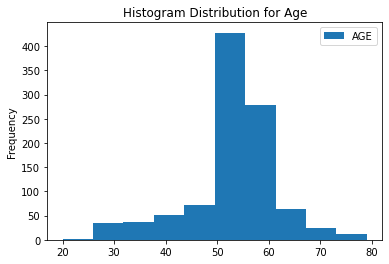

In [20]:
diabetes["AGE"].plot(kind='hist')
plt.title("Histogram Distribution for Age")
plt.legend()

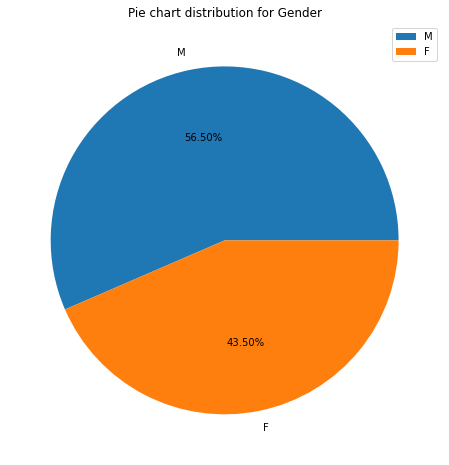

In [19]:
diabetes_counts =diabetes['Gender'].value_counts() 
plt.figure(figsize=(8,8))
plt.title("Pie chart distribution for Gender")
plt.pie(diabetes_counts.values, labels = diabetes_counts.index, autopct='%0.2f%%')
plt.legend()
plt.show()

In [75]:
diabetes.corr()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
ID,1.000000,0.064920,-0.065980,-0.094434,-0.102457,-0.007571,0.044390,-0.055908,0.026231,-0.064305,0.146142,0.049409
No_Pation,0.064920,1.000000,-0.088006,-0.019160,0.000692,-0.032057,-0.030171,-0.039885,-0.013357,-0.003171,0.113754,0.017719
AGE,-0.065980,-0.088006,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956
Urea,-0.094434,-0.019160,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618
Cr,-0.102457,0.000692,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746
HbA1c,-0.007571,-0.032057,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350
Chol,0.044390,-0.030171,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678
TG,-0.055908,-0.039885,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757
HDL,0.026231,-0.013357,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409
LDL,-0.064305,-0.003171,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322


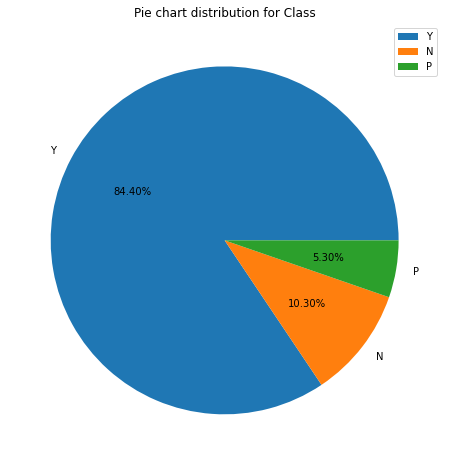

In [76]:
diabetes_counts =diabetes['CLASS'].value_counts() 
plt.figure(figsize=(8,8))
plt.title("Pie chart distribution for Class")
plt.pie(diabetes_counts.values, labels = diabetes_counts.index, autopct='%0.2f%%')
plt.legend()
plt.show()

In [77]:
count_P_class = diabetes[diabetes['CLASS'] == 'P']
count_P_class

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
103,472,463,M,34,3.9,81,6.0,6.2,3.9,0.80,1.90,1.8,23.0,P
104,85,46300,M,34,3.9,81,6.0,6.2,3.9,0.80,3.80,1.8,23.0,P
105,710,87671,M,34,3.9,81,6.0,6.2,3.9,0.80,3.80,1.8,23.0,P
106,429,48036,M,31,3.4,55,5.7,4.9,1.6,1.00,3.20,0.7,24.0,P
107,702,87667,M,31,3.4,55,5.7,4.9,1.6,1.00,3.20,0.7,24.0,P
108,4,34301,F,43,2.1,55,5.7,4.7,5.3,0.90,1.70,2.4,25.0,P
109,189,30383,M,42,5.4,53,5.8,5.9,3.7,1.30,3.10,1.7,23.0,P
110,201,45573,M,47,4.1,87,6.2,3.7,1.8,1.00,2.00,0.8,23.0,P
111,285,47069,M,50,4.3,59,6.1,4.0,3.0,1.00,1.80,1.3,24.0,P
112,393,47496,M,49,5.0,74,6.2,2.0,0.8,0.60,1.00,0.4,25.0,P


In [78]:
count_P_class.count()

ID           53
No_Pation    53
Gender       53
AGE          53
Urea         53
Cr           53
HbA1c        53
Chol         53
TG           53
HDL          53
LDL          53
VLDL         53
BMI          53
CLASS        53
dtype: int64

In [79]:
# Remove rows where the class is 'P'
diabetes = diabetes[diabetes['CLASS'] != 'P']

In [80]:
diabetes_num = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'Gender']

In [81]:
#conversion of categorical to numerical
from sklearn import preprocessing
label_En=preprocessing.LabelEncoder()

In [82]:
diabetes['Gender']=label_En.fit_transform(diabetes['Gender']) #Convert data to numerical datatype

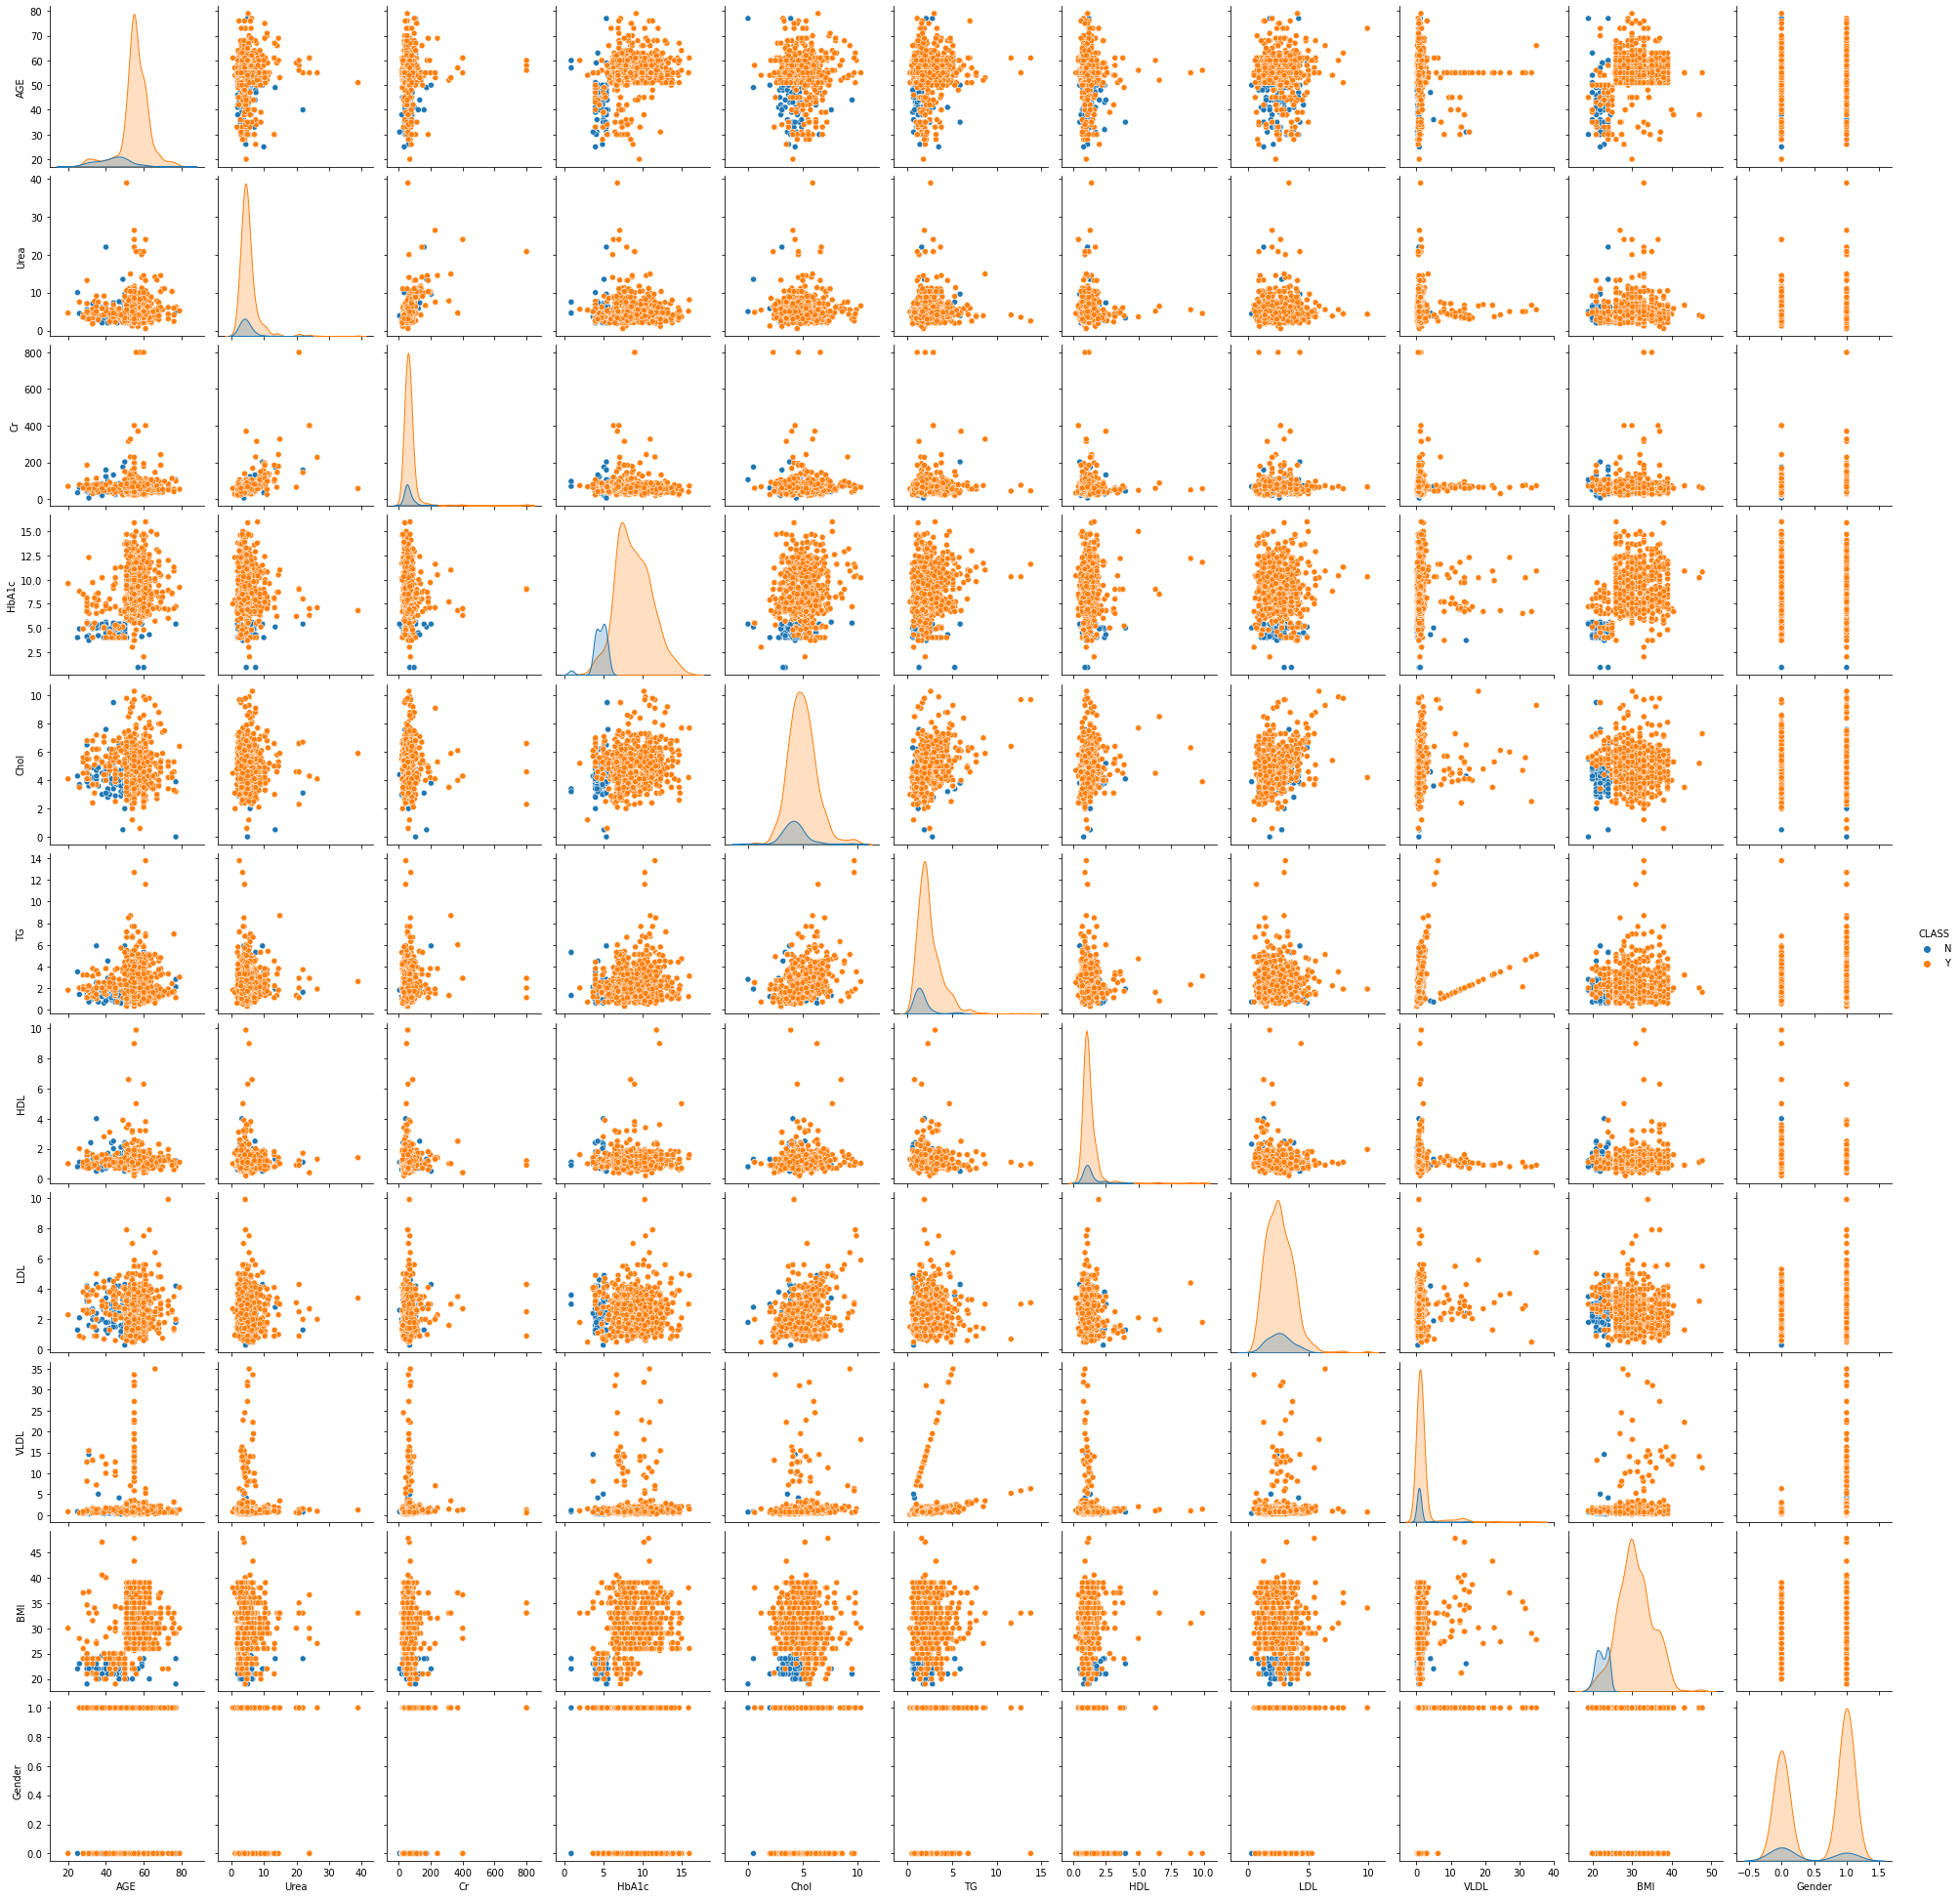

In [83]:
sns.pairplot(diabetes, hue='CLASS', vars=diabetes_num)

In [84]:
diabetes['CLASS']=label_En.fit_transform(diabetes['CLASS']) # transform CLASS to numerical datatype

In [85]:
diabetes_num.append('CLASS')

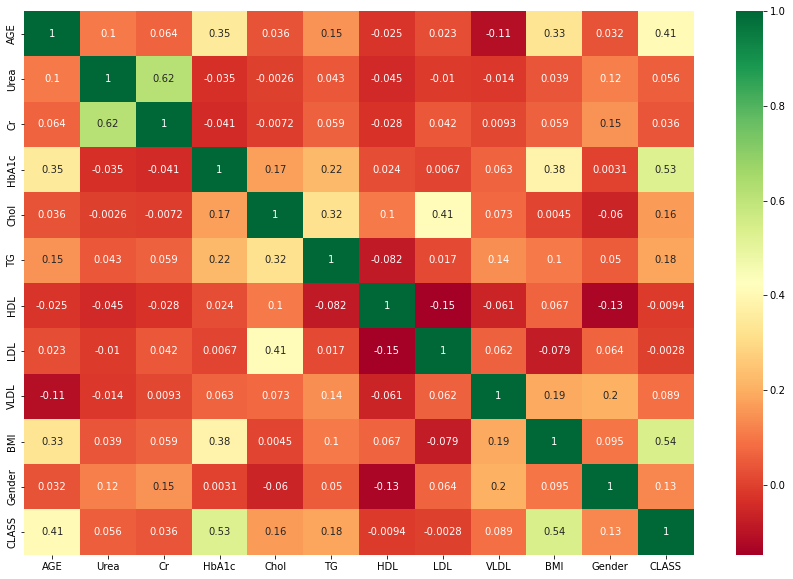

In [86]:
plt.figure(figsize=(15,10))
diabetes_heatmap =sns.heatmap(diabetes[diabetes_num].corr(),annot=True,cmap="RdYlGn")

FEATURE SELECTION

In [87]:
diabetes.drop(["ID", "No_Pation"], axis=1, inplace = True)
# removing these columns because the info does't help our model

In [88]:
diabetes.head(5)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [89]:
# Creating the feature matrix X by dropping the "Survived" column from the DataFrame 'data'
# using the drop() function with axis=1 to drop columns
# The result is assigned to the variable X
X = diabetes.drop("CLASS", axis=1)

# Creating the target variable y by assigning the "Survived" column from the DataFrame 'data' to Y
# The result is assigned to the variable y
y= diabetes["CLASS"]

In [90]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [91]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)

In [92]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [93]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
featureScores

,Features,Score
0,Gender,6.700649
1,AGE,208.030354
2,Urea,5.128865
3,Cr,66.533623
4,HbA1c,203.556837
5,Chol,8.807594
6,TG,26.565293
7,HDL,0.031325
8,LDL,0.003529
9,VLDL,55.931011


In [94]:
print(featureScores.nlargest(8,'Score'))

   Features       Score
10      BMI  218.573992
1       AGE  208.030354
4     HbA1c  203.556837
3        Cr   66.533623
9      VLDL   55.931011
6        TG   26.565293
5      Chol    8.807594
0    Gender    6.700649


Splitting The Dataset into Test and Train set

In [95]:
# Split the feature matrix X and the target variable Y into training and testing sets
# using the train_test_split() function from the scikit-learn library
# The X and y are passed as the first two parameters to train_test_split()
# The test_size parameter is set to 0.2, which means 20% of the data will be used for testing, and 80% for training
# The random_state parameter is set to 42 to ensure reproducibility of the random shuffling during the split
# The resulting training and testing sets are assigned to X_train, X_test, y_train, and y_test variables, respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42,
                                                    stratify=y)

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ##print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ##print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

A.  Random Forest Classification Model

In [98]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=13)
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=13)

TRAINING ACCURACY OF MODEL

In [99]:
# Calculating the accuracy score of the random forest  model on the training dataset
# using the score() method of the random forest  object
# The X_train and y_train parameters are provided as the training data
print_score(random_forest, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    72.0  590.0       1.0      662.0         662.0
_______________________________________________


TESTING ACCURACY OF MODEL

In [100]:
# Calculating the accuracy score of the random forest model on the test dataset
# using the score() method of the random forest object
# The X_test and y_test parameters are provided as the test data
print_score(random_forest, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 98.60%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.965517    0.988281  0.985965    0.976899      0.985805
recall      0.903226    0.996063  0.985965    0.949644      0.985965
f1-score    0.933333    0.992157  0.985965    0.962745      0.985759
support    31.000000  254.000000  0.985965  285.000000    285.000000
_______________________________________________


CONFUSION MATRIX FOR MODEL

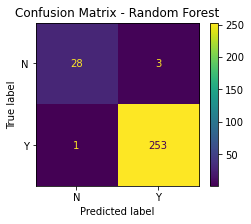

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
classNames = ['N', 'Y']
predictions = random_forest.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classNames)  

fig, ax = plt.subplots(figsize=(4, 3))
disp.plot(ax=ax)  

# Set the title
ax.set_title('Confusion Matrix - Random Forest')

plt.show()

In [102]:
from sklearn.metrics import roc_curve, roc_auc_score
def perfomance_record(clf):
    pred = clf.predict(X_test) 
    fpr, tpr, threshold = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])
    roc_auc_score_ = roc_auc_score(y_test,pred)
    plt.figure()
    plt.plot(fpr,tpr, label="Roc_AUC_score (area = %0.2f)" %roc_auc_score_)
    plt.plot([0,1],[0,1], "b--")
    plt.xlabel('True postive rate')
    plt.ylabel('False Postive rate')
    plt.legend(loc="lower right")

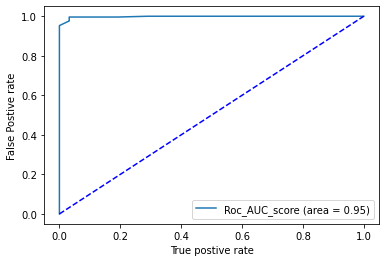

In [103]:
perfomance_record(random_forest)

B.  Support Vector Machine ModeL

In [104]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [105]:
from sklearn.svm import SVC
model_svm = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5,probability=True)
model_svm.fit(X_train, y_train)

SVC(C=5, coef0=1, degree=2, gamma='auto', kernel='poly', probability=True)

In [106]:
model= model_svm.predict(X_test)

TRAINING ACCURACY

In [107]:
# Calculating the accuracy score of the SVM model on the training dataset
# using the score() method of the SVM object
# The X_train and y_train parameters are provided as the training data
print_score(svm, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 98.04%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.904110    0.989813  0.980363    0.946961      0.980492
recall      0.916667    0.988136  0.980363    0.952401      0.980363
f1-score    0.910345    0.988974  0.980363    0.949659      0.980422
support    72.000000  590.000000  0.980363  662.000000    662.000000
_______________________________________________


TESTING ACCURACY

In [108]:
# Calculating the accuracy score of the svm model on the test dataset
# using the score() method of the svm object
# The X_test and y_test parameters are provided as the test data
print_score(svm, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 97.19%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.896552    0.980469   0.97193    0.938510      0.971341
recall      0.838710    0.988189   0.97193    0.913449      0.971930
f1-score    0.866667    0.984314   0.97193    0.925490      0.971517
support    31.000000  254.000000   0.97193  285.000000    285.000000
_______________________________________________


CONFUSION MATRIX

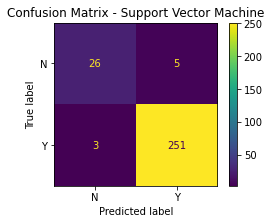

In [109]:
predictions = svm.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classNames)  

fig, ax = plt.subplots(figsize=(4, 3))
disp.plot(ax=ax)  

# Set the title
ax.set_title('Confusion Matrix - Support Vector Machine')

plt.show()

In [110]:
from sklearn.metrics import roc_curve, roc_auc_score
def perfomance_record(clf):
    pred = clf.predict(X_test) 
    fpr, tpr, threshold = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
    roc_auc_score_ = roc_auc_score(y_test,pred)
    plt.figure()
    plt.plot(fpr,tpr, label="Roc_AUC_score (area = %0.2f)" %roc_auc_score_)
    plt.plot([0,1],[0,1], "b--")
    plt.xlabel('True postive rate')
    plt.ylabel('False Postive rate')
    plt.legend(loc="lower right")

In [111]:
# perfomance_record(svm)

RESULTS INTERPRETATION

Feature Importance

In [112]:
#Getting Feature Importance of Models
feature_importances = random_forest.feature_importances_

In [113]:
# Create a DataFrame to display feature importance
feature_importance_RanFor = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_RanFor = feature_importance_RanFor.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_RanFor)

   Feature  Importance
10     BMI    0.330709
4    HbA1c    0.226861
1      AGE    0.152015
5     Chol    0.115297
9     VLDL    0.057223
6       TG    0.050727
8      LDL    0.022529
3       Cr    0.019119
2     Urea    0.011663
7      HDL    0.008368
0   Gender    0.005489


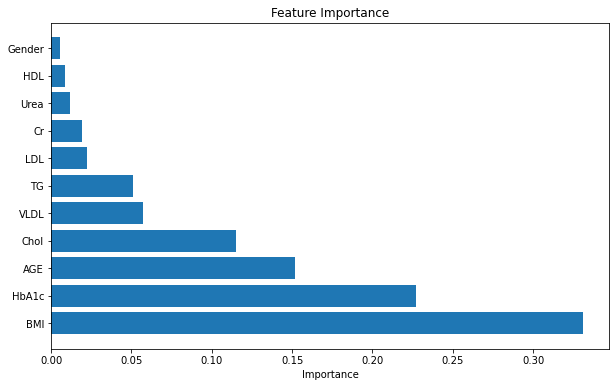

In [114]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_RanFor['Feature'], feature_importance_RanFor['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

FEATURE IMPORTANCE

It can be seen from the visualization above the features that had the most relevance for the Random Forest Classifier Model. It can be inferred that the features that were most significant when predicting or detecting diabetes are:
•	BMI
•	Lipid Profile
•	Cholesterol level
•	Age

POSSIBLE APPLICATIONS IN HEALTHCARE

These models can be deployed and be applied to help health sector. Healthcare can benefit from this project for diabetes prediction in a number of ways such as:
1.	Early Detection and Diagnosis: The model can help in early detction of diabetes by the analysis of noted important features. Early diagnosis allows for timely intervention and management, potentially preventing or delaying the onset of complications.
2.	Risk Stratification: The models can stratify patients based on their risk of developing diabetes. This information can be used to prioritize interventions and resources for those at higher risk, leading to more efficient healthcare delivery.
3.	Personalized Treatment Plans: The models can assist in developing personalized treatment plans based on individual patient characteristics. Tailored interventions may include lifestyle recommendations, medication choices, and monitoring strategies.
4.	Resource Allocation: Healthcare providers can use these models to allocate resources more efficiently. For example, identifying patients at higher risk can help in allocating preventive services and targeted interventions to the individuals who need them the most.
5.	Remote Patient Monitoring: These models can be integrated into remote monitoring systems, allowing continuous monitoring of patients' health parameters. This can help healthcare providers in assessing the effectiveness of treatment plans and making timely adjustments.
6.	Patient Engagement and Education: The models can support patient engagement by providing personalized health insights and recommendations. Educational content and lifestyle advice can be tailored to individual patients based on their health status and risk factors.
7.	Decision Support for Clinicians: The models can serve as decision support tools for healthcare professionals. By analyzing patient data, these models can assist clinicians in making informed decisions regarding diagnosis, treatment, and follow-up care.
8.	Public Health Planning: Aggregated data from the models can be used for public health planning and policy development. Identifying population-level trends and risk factors can inform public health strategies for diabetes prevention and management.
9.	Clinical Trials and Research: The models can aid in patient selection for clinical trials and research studies. By identifying individuals with specific characteristics or at particular risk levels, researchers can recruit suitable participants for studies.
10.	Continuous Improvement: The models can be updated and refined over time as more data becomes available. Continuous improvement ensures that the model stays relevant and accurate in predicting diabetes risk and outcomes.
